In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Singular value decomposition

The singular value decomposition (SVD) of a matrix is a powerful tool in numerical linear algebra.

One application of SVD is a technique called *Principal Component Analysis*. The idea is to better understand and/or visualize high-dimensional data by projecting down to a lower dimension. We will illustrate the problem with a classical dataset from computer vision/Optical character recognition (OCR).

Principal Component Analysis can also be applied to images in different ways. In the textbook, it is shown how PCA can be applied to multiple images of the same object to increase contrast.

## A digit data set
The Python library [Scikit-learn](https://scikit-learn.org/) has several example datasets. One of them is the UCI ML hand-written digits dataset [Link](https://scikit-learn.org/stable/datasets/toy_dataset.html#digits-dataset)

This dataset contains 1797 data points. Each data point is a low resolution grayscale image of a handwritten digit. We can show each digit with the `plt.matshow` command. 

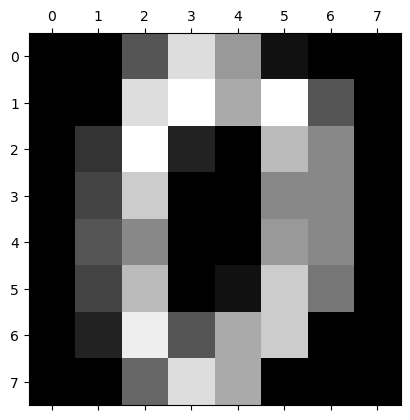

In [2]:
from sklearn.datasets import load_digits
digits=load_digits()

# Plotting the 0'th digit:
plt.matshow(digits.images[0], cmap='gray')

This is probably the negative of the original image, but it's what `plt.matshow` gave us, so we'll roll with it.

A grayscale image is really just a vector of numbers.

Each vector entry corresponds to a pixel, and the value represents the color of the pixel. In this case, the scale goes from 0 (black) to 16 (white), and the numbers in between represent various shades of gray.

In [3]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

The vector `digits.target` tells us what the digits are. (The "labels" in machine-learning lingo.) 

For example, the zeroth image is the digit zero.

In [4]:
digits.target[0]

0

In the OCR problem, one would try to find a function 
$$f: \mathbb{R}^{64} \to \{0,1,2,...,9\}$$
which sends each image to its label.

We are not going to solve the OCR problem, we are just going to visualize the data sets, and use the labels for colors.

In [5]:
X=digits.data.T
C=digits.target
X.shape

(64, 1797)

The data points live in $\mathbb{R}^{64}$. It is hard to imagine 64 dimensions at once, and visualizations of the data set will have to be lower dimensional, for example in $\mathbb{R}^2$ or $\mathbb{R}^3.$

Let us try plotting the first two dimensions of the dataset:

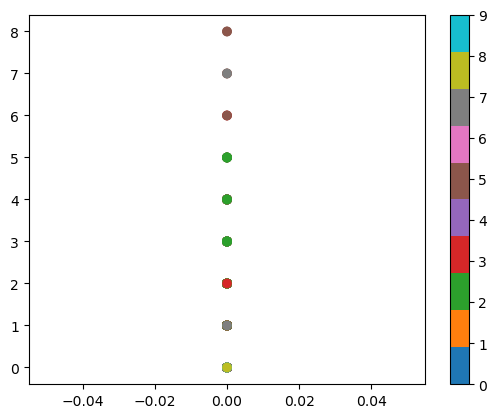

In [6]:
plt.figure()
plt.scatter(X[0,:], X[1,:], c=C, cmap='tab10')
plt.colorbar()

This is not a very useful plot for visualizing the data. We plotted 1797 data points and got only 9 dots, which means that most data points coincide and are not visible in the plot.

We learn that $x_0= 0$ for all data points, (meaning that the upper left pixel is completely black in all the images,) but not much else. 

What if we project onto another set of coordinate axes?

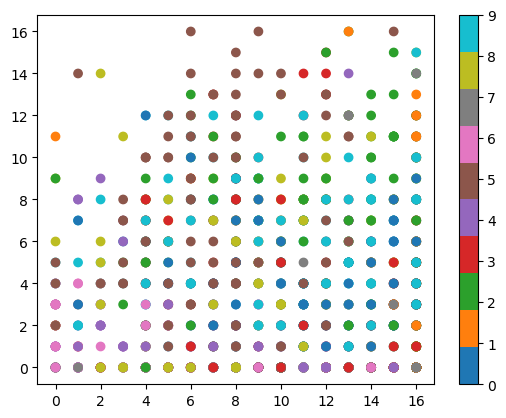

In [7]:
plt.figure()
plt.scatter(X[12,:], X[17,:], c=C, cmap='tab10')
plt.colorbar()

This is better than before, but we quickly realize that all we are doing is looking at two specific pixels out of 64. The plot above contains zero information about the other 62 pixels.

We can do a lot better by projecting onto a different 2-dimensional subspace, one that is not aligned with the original axes. 

But how can we choose this subspace?

We will complete the example next weekl, but to understand the problem better, let us look at a toy problem first.

## Toy problem : from 2 to 1 dimension

A toy problem is a simpler problem that provides insight into the problem we are really trying to solve.

Instead of going from 64 to 2 dimensions, as we want to do with the digit data set, let us say we have data in $\mathbb{R}^2$ that we want to plot as one-dimensional data.

That is, we have a set of data 
$\left\{\begin{bmatrix} x_1 \\y_1\end{bmatrix}, \begin{bmatrix} x_2 \\y_2\end{bmatrix}, \dotsc, \begin{bmatrix} x_N \\y_N\end{bmatrix}\right\}$ in $\mathbb{R}^2$, and we want to choose a subspace $H=\mathrm{span}(\mathbf{v})$ and project all the data points down to $H$. 
We assume $\mathbf{v}$ is of unit length, $\|\mathbf{v}\|=1$.

![An illustration of the toy problem](ToyProblem.png "An illustration of the toy problem")

Which vector $\mathbf{v}$ do we choose? 

We try to choose $\mathbf{v}$ such that the projections are as close to the original data points as possible. That is, we minimize
$$
\begin{aligned}
L(\mathbf{v})=& \sum_{i=1}^N  \|\mathbf{x}_i-\mathrm{proj}_{\mathbf{v}}\mathbf{x}_i\|^2\\ 
  =&\sum_{i=1}^N\|\mathbf{x}_i-(\mathbf{x}_i^T\mathbf{v})\mathbf{v}\|^2,\\ 
  \end{aligned}
$$
under the constraint $\|\mathbf{v}\|=1$.
 
By Pythagoras, we have
$$\begin{aligned}
\|\mathbf{x}_i-\mathbf{v}\mathbf{v}^T\mathbf{x}_i\|^2=& \|\mathbf{x}_i\|^2-(\mathbf{x}_i^T\mathbf{v})^2\|\mathbf{v}\|^2\\
=&\|\mathbf{x}_i\|^2-(\mathbf{x}_i^T\mathbf{v})^2.
\end{aligned}
$$
Therefore, we have
$$
\begin{aligned}
L(\mathbf{v})=& \sum_{i=1}^N\left(\|\mathbf{x}_i\|^2-(\mathbf{x}_i^T\mathbf{v})^2\right)\\
=& \sum_{i=1}^N\|\mathbf{x}_i\|^2 -  \sum_{i=1}^N(\mathbf{x}_i^T\mathbf{v})^2.
  \end{aligned}
$$
We can't do anything with the term $\sum_{i=1}^N\|\mathbf{x}_i\|^2$, as it depends only on the data not on $\mathbf{v}$.

To minimize $L(\mathbf{v})$, we have to *maximize* the function
$$Q(\mathbf{v})=\sum_{i=1}^N(\mathbf{x}_i^T\mathbf{v})^2,$$
This is a quadratic form.

We see that the problem of choosing $\mathbf{v}$ corresponds to maximizing a quadratic form under a constraint $\|\mathbf{v}\|=1$.

In the lectures, we will see that the solution of such constrained optimization problems is given by an eigenvector of the matrix of the quadratic form. In this case the matrix is 
$$XX^T= \begin{bmatrix} \sum_i x_i^2 & \sum_i x_iy_i \\
                       \sum_i x_iy_i & \sum_i y_i^2
        \end{bmatrix},$$
where 
$$X= \begin{bmatrix} x_1 & x_2 & \dots & x_N\\
                     y_1 & y_2 & \dots & y_N
\end{bmatrix}$$
is the matrix containing the data.

## Singular value decomposition

In general, for all matrices $A\in \mathbb{R}^{m\times n}$, the matrices $A^TA\in \mathbb{R}^{n \times n}$ and $AA^T\in \mathbb{R}^{m\times m}$ are symmetric. 

The spectral theorem tells us that symmetric matrices are orthogonally diagonalizable. We can use the eigenvalues and eigenvectors of the symmetric matrices $A^TA$ and $AA^T$ to factorize the matrix $A$ as
$$A=U\Sigma V^T$$
where
* $U$ is an orthogonal matrix whose columns are eigenvectors of $AA^T$.
* $V$ is an orthogonal matrix whose columns are eigenvectors of $A^TA$.
* $\Sigma$ is a diagonal matrix with the *singular values* of $A$ on the diagonal.

This is called the *singular value decomposition (SVD)* of the matrix $A$. Details will be covered in the lectures.


In the remainder of the course, we will explore the significance and uses of the singular value decomposition including 

* Principal Component Analysis/Dimension reduction. (Described above.)
* Stability analysis - How does measuring errors/noise affect the solutions to linear equations and least squares problems?
* Regularization - Techniques for handling noisy data.
* Efficient and robust computation of bases for the fundamental subspaces $\textrm{Null}(A)$, $\textrm{Col}(A)$, $\textrm{Row}(A)$ and $\textrm{Null}(A^T)$.